<a href="https://colab.research.google.com/github/raulFuzita/cct_ai/blob/week8/CCT_Artificial_Intelligence_week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCT Artificial Intelligence - Week8 (08/11/2021)

**Lecturer:** David McQuaid

**Student:** Raul Macedo Fuzita

Check Github repository for more exercises: https://github.com/raulFuzita/cct_ai/tree/main

Click on the branch dropdown box and select the week exercise.

## Challange

The exercise in week 8 asks to perform an A-Star algorithm to search for the shortest path from Arad to Bucharest. Based on the following picture you should represent it as a data structure.

Find the optimal path from Arad to Bucharest

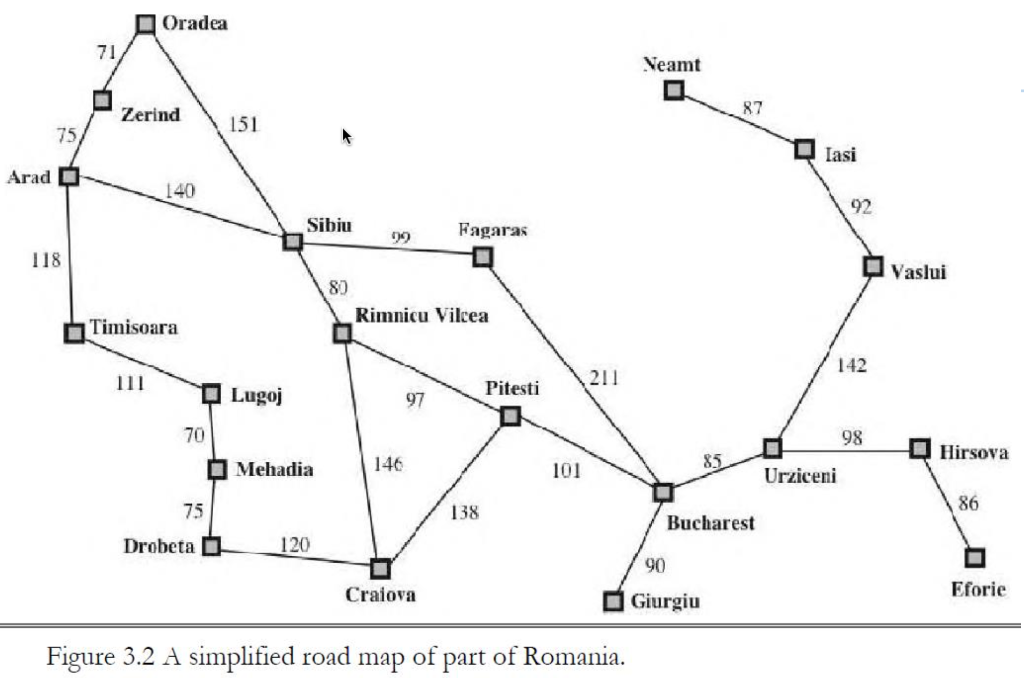

The A-Star Algorithm will calculate the shortest path; however, to plot a graph with nodes and edges it is necessary to implement other packages, such as **Networkx**. Networkx will require a dataset with heuristic information, and another one with nodes' location.

The picture above show the distance (edges' weight) between each node; however, there is no geolocation (position) for each node. To address this problem roughly, the dataset location was based on Google Earth location.

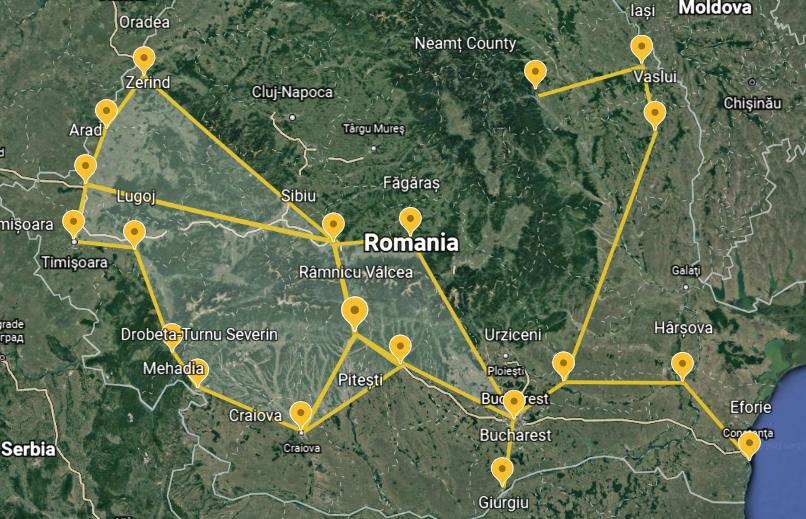

In [206]:
#@title Please, run this Jupyter Notebook cell to load important packages and the dataset. This section is required to run only once.
#@markdown The A-Star Algorithm is based on the source available at: https://www.pythonpool.com/a-star-algorithm-python/

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df_romania_dist = pd.read_csv("https://raw.githubusercontent.com/raulFuzita/cct_ai/week8/romania_cities_distance.csv")
df_romania_loc = pd.read_csv("https://raw.githubusercontent.com/raulFuzita/cct_ai/week8/romania_cities_location.csv")

g = nx.from_pandas_edgelist(df_romania_dist, source='source', target='target', edge_attr='distance')

g.add_nodes_from(pos.keys())
for row in df_romania_loc.itertuples():
    g.nodes[row.city]['pos'] = (row.x, row.y)

pos = nx.get_node_attributes(g, 'pos')
labels = nx.get_edge_attributes(g, 'distance')

dic_romania_disc = df_romania_dist.groupby('source')[['target', 'distance']].apply(lambda g: list(map(tuple, g.values.tolist()))).to_dict()
graph = Graph(dic_romania_disc)

# Python Pool, 2021, The Insider’s Guide to A* Algorithm in Python
# Available at: https://www.pythonpool.com/a-star-algorithm-python/

from collections import deque
 
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
 
    def get_neighbors(self, v):
        return self.adjac_lis[v]
 
    def a_star_algorithm(self, start, stop):
        # In this open_lst is a lisy of nodes which have been visited, but who's 
        # neighbours haven't all been always inspected, It starts off with the start 
        # node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])
 
        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}
        poo[start] = 0
 
        # par contains an adjacent mapping of all nodes
        par = {}
        par[start] = start
 
        while len(open_lst) > 0:
            n = None
 
            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] < poo[n]:
                    n = v;
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []
 
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
 
                reconst_path.append(start)
 
                reconst_path.reverse()
 
                print('Path found: {}'.format(reconst_path))
                return reconst_path
 
            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
 
                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n
 
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
 
            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)
 
        print('Path does not exist!')
        return None


Path found: ['arad', 'sibiu', 'rimnicu vilcea', 'pitesti', 'bucharest']


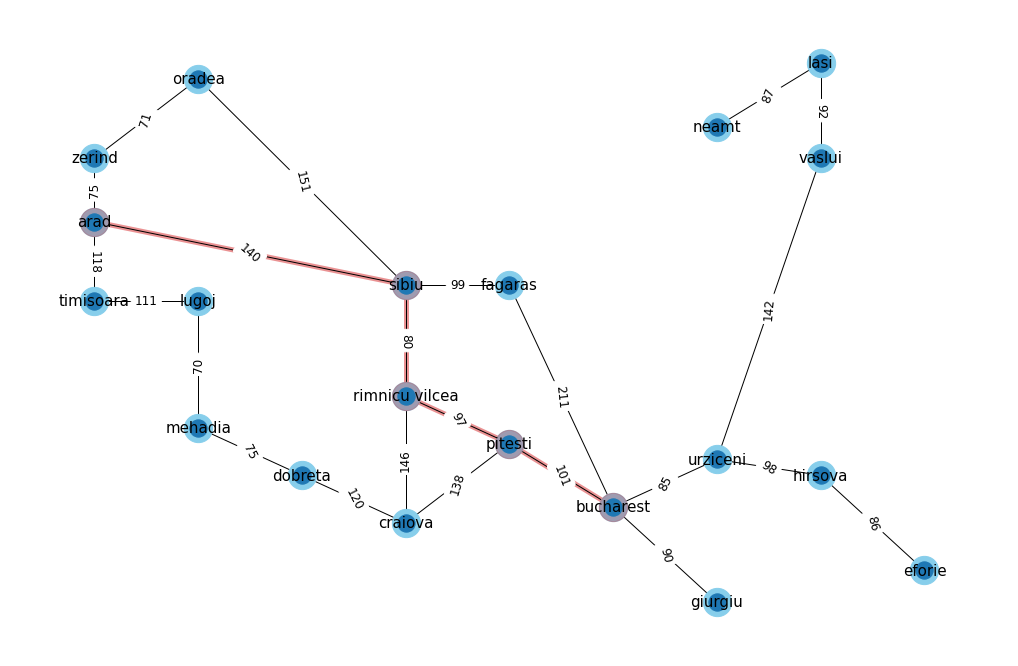

In [207]:

#@title Select a city where you're going to start from and another where you're going to.
#@markdown Make sure you have run all required section above. You can click on the dropdown boxes to change the destination.

from_ = "arad" #@param ["arad", "bucharest", "craiova", "dobreta", "eforie", "fagaras", "giurgiu", "hirsova", "lasi", "lugoj", "mehadia", "neamt", "oradea", "pitesti", "rimnicu vilcea", "sibiu", "timisoara", "urziceni", "vaslui", "zerind"]
to_ = "bucharest" #@param ["arad", "bucharest", "craiova", "dobreta", "eforie", "fagaras", "giurgiu", "hirsova", "lasi", "lugoj", "mehadia", "neamt", "oradea", "pitesti", "rimnicu vilcea", "sibiu", "timisoara", "urziceni", "vaslui", "zerind"]

shortestPath = graph.a_star_algorithm(from_, to_)

painted_edge = []
index = len(shortestPath)-1
while index > 0:
  painted_edge.append((shortestPath[index], shortestPath[index-1]))
  index -= 1
painted_edge

plt.figure(3, figsize=(18,12))

nx.draw_networkx_edge_labels(g, pos, edge_labels=labels, font_size=12)
options = {"node_color":"skyblue", "node_size": 800}
nx.draw_networkx_nodes(g, pos, **options)
nx.draw_networkx_nodes(g, pos, nodelist=shortestPath, node_color="tab:red", node_size=800, alpha=0.3)

nx.draw_networkx_edges(g, pos, edgelist=painted_edge, width=5, alpha=0.5, edge_color='tab:red')

nx.draw(g, pos, with_labels=True, font_size=15)
plt.show()